# Consensus

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Loading *csv* file in *dataframe*

In [2]:
df = pd.read_csv("adult.csv",1,",")
data = [df]
print df.head()

   age workclass  fnlwgt     education  education-num marital-status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital-gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital-loss  hours-per-week        country salary  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

### Convert *salary* to integer

In [3]:
salary_map={'<=50K':1,'>50K':0}
df['salary']=df['salary'].map(salary_map).astype(int)
    
print df.head(10)

   age    workclass  fnlwgt     education  education-num marital-status  \
0   90            ?   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66            ?  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital-gain  \
0                  ?   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family

### convert *sex* into *integer*

In [4]:
df['sex'] = df['sex'].map({'Male':1,'Female':0}).astype(int)

print df.head()
print ("-"*40)
print df.info()

   age workclass  fnlwgt     education  education-num marital-status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race  sex  capital-gain  capital-loss  \
0                  ?  Not-in-family  White    0             0          4356   
1    Exec-managerial  Not-in-family  White    0             0          4356   
2                  ?      Unmarried  Black    0             0          4356   
3  Machine-op-inspct      Unmarried  White    0             0          3900   
4     Prof-specialty      Own-child  White    0             0          3900   

   hours-per-week        country  salary  
0              40  United-States       1  
1     

### Find correlation between columns

In [5]:
def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

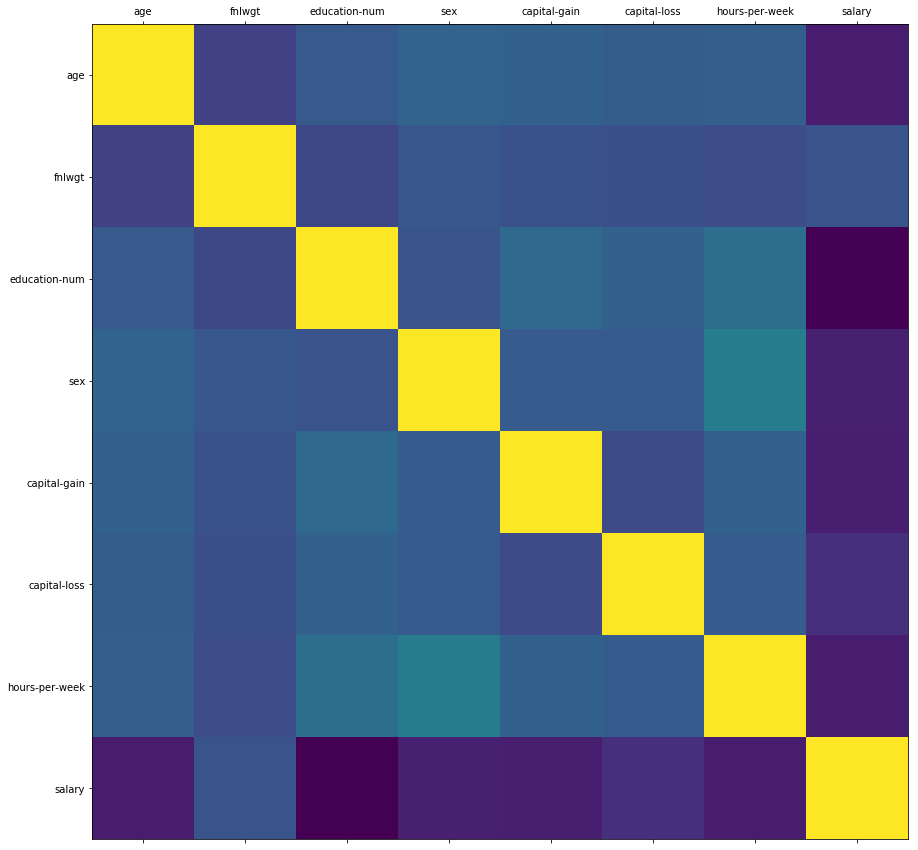

In [6]:
plot_correlation(df)


### Categorise in US and Non-US candidates

In [7]:
print df[['country','salary']].groupby(['country']).mean()

                              salary
country                             
?                           0.749571
Cambodia                    0.631579
Canada                      0.677686
China                       0.733333
Columbia                    0.966102
Cuba                        0.736842
Dominican-Republic          0.971429
Ecuador                     0.857143
El-Salvador                 0.915094
England                     0.666667
France                      0.586207
Germany                     0.678832
Greece                      0.724138
Guatemala                   0.953125
Haiti                       0.909091
Holand-Netherlands          1.000000
Honduras                    0.923077
Hong                        0.700000
Hungary                     0.769231
India                       0.600000
Iran                        0.581395
Ireland                     0.791667
Italy                       0.657534
Jamaica                     0.876543
Japan                       0.612903
L

### Drop empty value marked as '?'

In [8]:
print df.shape
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

df.dropna(how='any',inplace=True)

print df.shape
df.head(10)

(32561, 15)
(30162, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,1
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United-States,1
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,1
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,0,0,3683,20,United-States,0
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,0,0,3683,40,United-States,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,0,0,3004,35,United-States,0
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,1,0,2824,45,United-States,0
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,0,0,2824,20,United-States,0


In [9]:

for dataset in data:
    dataset.loc[dataset['country'] != 'United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == 'United-States', 'country'] = 'US'

In [10]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,US,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,US,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,US,1
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,US,1
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,US,1
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,0,0,3683,20,US,0
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,0,0,3683,40,US,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,0,0,3004,35,US,0
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,1,0,2824,45,US,0
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,0,0,2824,20,US,0


### Convert *country* in *integer*

In [11]:
df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)

In [12]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,1,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,1,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,1,1
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,1,1
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,1,1
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,0,0,3683,20,1,0
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,0,0,3683,40,1,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,0,0,3004,35,1,0
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,1,0,2824,45,1,0
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,0,0,2824,20,1,0


### Data visualisation using histogram

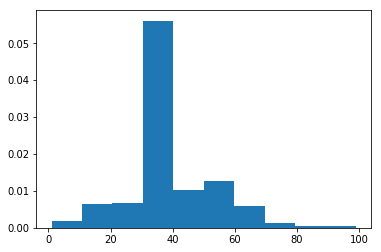

In [13]:
x= df['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

In [14]:
print df[['relationship','salary']].groupby(['relationship']).mean()

                  salary
relationship            
Husband         0.544331
Not-in-family   0.893477
Other-relative  0.960630
Own-child       0.985670
Unmarried       0.933686
Wife            0.506401


In [15]:
print df[['marital-status','salary']].groupby(['marital-status']).mean()

                         salary
marital-status                 
Divorced               0.892738
Married-AF-spouse      0.523810
Married-civ-spouse     0.545041
Married-spouse-absent  0.916216
Never-married          0.951676
Separated              0.929712
Widowed                0.903265


### Categorise marital-status into single and couple

In [16]:

df['marital-status'] = df['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')

print df.head(10)

    age         workclass  fnlwgt     education  education-num marital-status  \
1    82           Private  132870       HS-grad              9         Single   
3    54           Private  140359       7th-8th              4         Single   
4    41           Private  264663  Some-college             10         Single   
5    34           Private  216864       HS-grad              9         Single   
6    38           Private  150601          10th              6         Single   
7    74         State-gov   88638     Doctorate             16         Single   
8    68       Federal-gov  422013       HS-grad              9         Single   
10   45           Private  172274     Doctorate             16         Single   
11   38  Self-emp-not-inc  164526   Prof-school             15         Single   
12   52           Private  129177     Bachelors             13         Single   

           occupation    relationship   race  sex  capital-gain  capital-loss  \
1     Exec-managerial   Not

In [17]:
print df[['marital-status','salary']].groupby(['marital-status']).mean()

                  salary
marital-status          
Couple          0.545009
Single          0.931637


In [18]:
print df[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

                                 salary
marital-status relationship            
Couple         Husband         0.544331
               Not-in-family   0.714286
               Other-relative  0.857143
               Own-child       0.821429
               Wife            0.506401
Single         Not-in-family   0.893802
               Other-relative  0.976623
               Own-child       0.988818
               Unmarried       0.933686


In [19]:
print df[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

                                 salary
relationship   marital-status          
Husband        Couple          0.544331
Not-in-family  Couple          0.714286
               Single          0.893802
Other-relative Couple          0.857143
               Single          0.976623
Own-child      Couple          0.821429
               Single          0.988818
Unmarried      Single          0.933686
Wife           Couple          0.506401


In [20]:

df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
   
print df.head(10)

    age         workclass  fnlwgt     education  education-num  \
1    82           Private  132870       HS-grad              9   
3    54           Private  140359       7th-8th              4   
4    41           Private  264663  Some-college             10   
5    34           Private  216864       HS-grad              9   
6    38           Private  150601          10th              6   
7    74         State-gov   88638     Doctorate             16   
8    68       Federal-gov  422013       HS-grad              9   
10   45           Private  172274     Doctorate             16   
11   38  Self-emp-not-inc  164526   Prof-school             15   
12   52           Private  129177     Bachelors             13   

    marital-status         occupation    relationship   race  sex  \
1                1    Exec-managerial   Not-in-family  White    0   
3                1  Machine-op-inspct       Unmarried  White    0   
4                1     Prof-specialty       Own-child  White    0 

In [21]:
rel_map = {'Unmarried':0,'Wife':1,'Husband':2,'Not-in-family':3,'Own-child':4,'Other-relative':5}

df['relationship'] = df['relationship'].map(rel_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
1,82,Private,132870,HS-grad,9,1,Exec-managerial,3,White,0,0,4356,18,1,1
3,54,Private,140359,7th-8th,4,1,Machine-op-inspct,0,White,0,0,3900,40,1,1
4,41,Private,264663,Some-college,10,1,Prof-specialty,4,White,0,0,3900,40,1,1
5,34,Private,216864,HS-grad,9,1,Other-service,0,White,0,0,3770,45,1,1
6,38,Private,150601,10th,6,1,Adm-clerical,0,White,1,0,3770,40,1,1
7,74,State-gov,88638,Doctorate,16,1,Prof-specialty,5,White,0,0,3683,20,1,0
8,68,Federal-gov,422013,HS-grad,9,1,Prof-specialty,3,White,0,0,3683,40,1,1
10,45,Private,172274,Doctorate,16,1,Prof-specialty,0,Black,0,0,3004,35,1,0
11,38,Self-emp-not-inc,164526,Prof-school,15,1,Prof-specialty,3,White,1,0,2824,45,1,0
12,52,Private,129177,Bachelors,13,1,Other-service,3,White,0,0,2824,20,1,0


### Analyse *race*

In [22]:
print df[['race','salary']].groupby('race').mean()

                      salary
race                        
Amer-Indian-Eskimo  0.881119
Asian-Pac-Islander  0.722905
Black               0.870075
Other               0.909091
White               0.736282


In [23]:
race_map={'White':0,'Amer-Indian-Eskimo':1,'Asian-Pac-Islander':2,'Black':3,'Other':4}


df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
1,82,Private,132870,HS-grad,9,1,Exec-managerial,3,0,0,0,4356,18,1,1
3,54,Private,140359,7th-8th,4,1,Machine-op-inspct,0,0,0,0,3900,40,1,1
4,41,Private,264663,Some-college,10,1,Prof-specialty,4,0,0,0,3900,40,1,1
5,34,Private,216864,HS-grad,9,1,Other-service,0,0,0,0,3770,45,1,1
6,38,Private,150601,10th,6,1,Adm-clerical,0,0,1,0,3770,40,1,1
7,74,State-gov,88638,Doctorate,16,1,Prof-specialty,5,0,0,0,3683,20,1,0
8,68,Federal-gov,422013,HS-grad,9,1,Prof-specialty,3,0,0,0,3683,40,1,1
10,45,Private,172274,Doctorate,16,1,Prof-specialty,0,3,0,0,3004,35,1,0
11,38,Self-emp-not-inc,164526,Prof-school,15,1,Prof-specialty,3,0,1,0,2824,45,1,0
12,52,Private,129177,Bachelors,13,1,Other-service,3,0,0,0,2824,20,1,0


In [24]:
print df[['occupation','salary']].groupby(['occupation']).mean()

                     salary
occupation                 
Adm-clerical       0.866165
Armed-Forces       0.888889
Craft-repair       0.774690
Exec-managerial    0.514780
Farming-fishing    0.883721
Handlers-cleaners  0.938519
Machine-op-inspct  0.875381
Other-service      0.958904
Priv-house-serv    0.993007
Prof-specialty     0.551511
Protective-serv    0.673913
Sales              0.729353
Tech-support       0.695175
Transport-moving   0.797074


In [25]:
print df[['workclass','salary']].groupby(['workclass']).mean()

                    salary
workclass                 
Federal-gov       0.612937
Local-gov         0.705370
Private           0.781208
Self-emp-inc      0.441341
Self-emp-not-inc  0.714286
State-gov         0.731040
Without-pay       1.000000


In [26]:
def f(x):
    if x['workclass'] == 'Federal-gov' or x['workclass']== 'Local-gov' or x['workclass']=='State-gov': return 'govt'
    elif x['workclass'] == 'Private':return 'private'
    elif x['workclass'] == 'Self-emp-inc' or x['workclass'] == 'Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment_type']=df.apply(f, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
1,82,Private,132870,HS-grad,9,1,Exec-managerial,3,0,0,0,4356,18,1,1,private
3,54,Private,140359,7th-8th,4,1,Machine-op-inspct,0,0,0,0,3900,40,1,1,private
4,41,Private,264663,Some-college,10,1,Prof-specialty,4,0,0,0,3900,40,1,1,private
5,34,Private,216864,HS-grad,9,1,Other-service,0,0,0,0,3770,45,1,1,private
6,38,Private,150601,10th,6,1,Adm-clerical,0,0,1,0,3770,40,1,1,private
7,74,State-gov,88638,Doctorate,16,1,Prof-specialty,5,0,0,0,3683,20,1,0,govt
8,68,Federal-gov,422013,HS-grad,9,1,Prof-specialty,3,0,0,0,3683,40,1,1,govt
10,45,Private,172274,Doctorate,16,1,Prof-specialty,0,3,0,0,3004,35,1,0,private
11,38,Self-emp-not-inc,164526,Prof-school,15,1,Prof-specialty,3,0,1,0,2824,45,1,0,self_employed
12,52,Private,129177,Bachelors,13,1,Other-service,3,0,0,0,2824,20,1,0,private


In [27]:
print df[['employment_type','salary']].groupby(['employment_type']).mean()

                   salary
employment_type          
govt             0.692702
private          0.781208
self_employed    0.632242
without_pay      1.000000


In [28]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

df['employment_type'] = df['employment_type'].map(employment_map)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
1,82,Private,132870,HS-grad,9,1,Exec-managerial,3,0,0,0,4356,18,1,1,1
3,54,Private,140359,7th-8th,4,1,Machine-op-inspct,0,0,0,0,3900,40,1,1,1
4,41,Private,264663,Some-college,10,1,Prof-specialty,4,0,0,0,3900,40,1,1,1
5,34,Private,216864,HS-grad,9,1,Other-service,0,0,0,0,3770,45,1,1,1
6,38,Private,150601,10th,6,1,Adm-clerical,0,0,1,0,3770,40,1,1,1
7,74,State-gov,88638,Doctorate,16,1,Prof-specialty,5,0,0,0,3683,20,1,0,0
8,68,Federal-gov,422013,HS-grad,9,1,Prof-specialty,3,0,0,0,3683,40,1,1,0
10,45,Private,172274,Doctorate,16,1,Prof-specialty,0,3,0,0,3004,35,1,0,1
11,38,Self-emp-not-inc,164526,Prof-school,15,1,Prof-specialty,3,0,1,0,2824,45,1,0,2
12,52,Private,129177,Bachelors,13,1,Other-service,3,0,0,0,2824,20,1,0,1


In [29]:
print df[['education','salary']].groupby(['education']).mean()

                salary
education             
10th          0.928049
11th          0.943702
12th          0.923077
1st-4th       0.960265
5th-6th       0.958333
7th-8th       0.937163
9th           0.945055
Assoc-acdm    0.746032
Assoc-voc     0.736802
Bachelors     0.578509
Doctorate     0.253333
HS-grad       0.835671
Masters       0.435771
Preschool     1.000000
Prof-school   0.250923
Some-college  0.799940


In [30]:
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
1,82,132870,9,1,3,0,0,0,4356,18,1,1,1
3,54,140359,4,1,0,0,0,0,3900,40,1,1,1
4,41,264663,10,1,4,0,0,0,3900,40,1,1,1
5,34,216864,9,1,0,0,0,0,3770,45,1,1,1
6,38,150601,6,1,0,0,1,0,3770,40,1,1,1
7,74,88638,16,1,5,0,0,0,3683,20,1,0,0
8,68,422013,9,1,3,0,0,0,3683,40,1,1,0
10,45,172274,16,1,0,3,0,0,3004,35,1,0,1
11,38,164526,15,1,3,0,1,0,2824,45,1,0,2
12,52,129177,13,1,3,0,0,0,2824,20,1,0,1


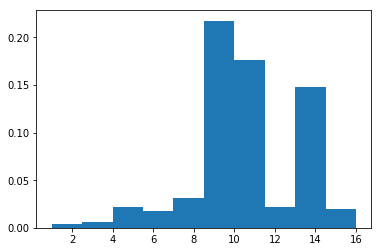

In [31]:
x= df['education-num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

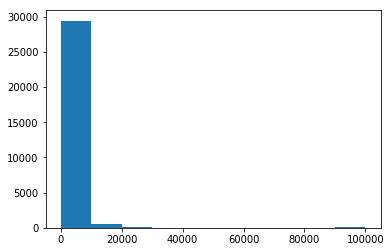

In [32]:
x=df['capital-gain']
plt.hist(x,bins=None,normed=None)
plt.show()

In [33]:
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0

In [34]:
df.head(25)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
1,82,132870,9,1,3,0,0,0,4356,18,1,1,1
3,54,140359,4,1,0,0,0,0,3900,40,1,1,1
4,41,264663,10,1,4,0,0,0,3900,40,1,1,1
5,34,216864,9,1,0,0,0,0,3770,45,1,1,1
6,38,150601,6,1,0,0,1,0,3770,40,1,1,1
7,74,88638,16,1,5,0,0,0,3683,20,1,0,0
8,68,422013,9,1,3,0,0,0,3683,40,1,1,0
10,45,172274,16,1,0,3,0,0,3004,35,1,0,1
11,38,164526,15,1,3,0,1,0,2824,45,1,0,2
12,52,129177,13,1,3,0,0,0,2824,20,1,0,1


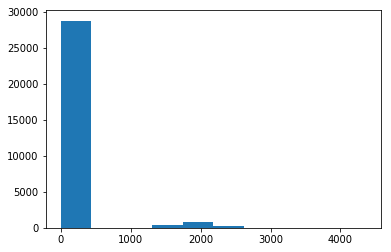

In [35]:
x=df['capital-loss']
plt.hist(x,bins=None)
plt.show()

In [36]:
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
1,82,132870,9,1,3,0,0,0,1,18,1,1,1
3,54,140359,4,1,0,0,0,0,1,40,1,1,1
4,41,264663,10,1,4,0,0,0,1,40,1,1,1
5,34,216864,9,1,0,0,0,0,1,45,1,1,1
6,38,150601,6,1,0,0,1,0,1,40,1,1,1
7,74,88638,16,1,5,0,0,0,1,20,1,0,0
8,68,422013,9,1,3,0,0,0,1,40,1,1,0
10,45,172274,16,1,0,3,0,0,1,35,1,0,1
11,38,164526,15,1,3,0,1,0,1,45,1,0,2
12,52,129177,13,1,3,0,0,0,1,20,1,0,1


In [37]:
print df['age'].count()

30162


## Applying model for learning

### Divide data into training data, validation, and final testing data

#### 50% training data, 20% validation data, 30% test data

In [47]:
from sklearn.model_selection import train_test_split

X= df.drop(['salary'],axis=1)
y=df['salary']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)


In [53]:
print "Train dataset: {0}{1}".format(X_train.shape, y_train.shape)
print "Validation dataset: {0}{1}".format(X_val.shape, y_val.shape)
print "Test dataset: {0}{1}".format(X_test.shape, y_test.shape)

Train dataset: (16890, 12)(16890L,)
Validation dataset: (4223, 12)(4223L,)
Test dataset: (9049, 12)(9049L,)
